# Crop Model Tuning & Performance Comparison


## Import Required Libraries


In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib


In [5]:
# !pip install scikit-learn
# !pip show scikit-learn

## Load and Preview Dataset


In [6]:
df = pd.read_csv("C:/JUPYTERPROJECTS/Crop_Advisory_system/data/Crop_recommendation.csv")
df.head()



,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


## Exploratory Data Analysis (EDA)


In [7]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

## Selecting Numerical Features


In [8]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])


## Outlier Detection – Feature-wise Boxplots


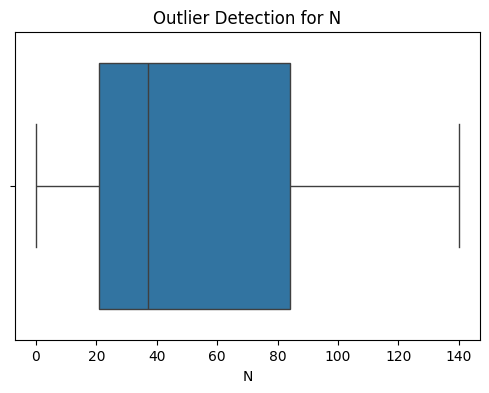

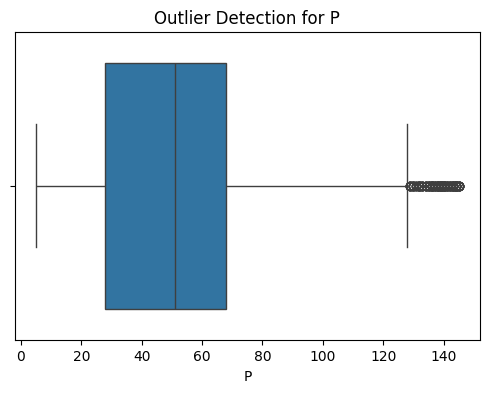

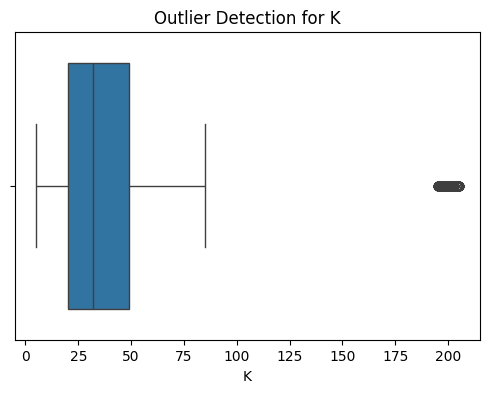

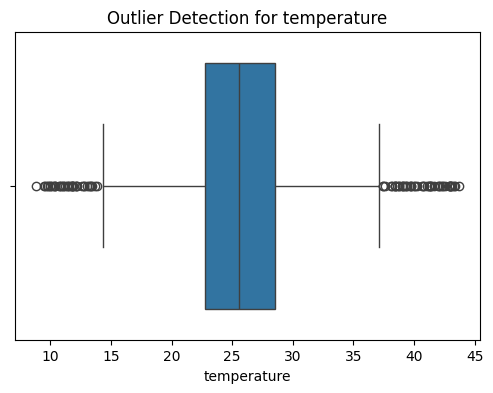

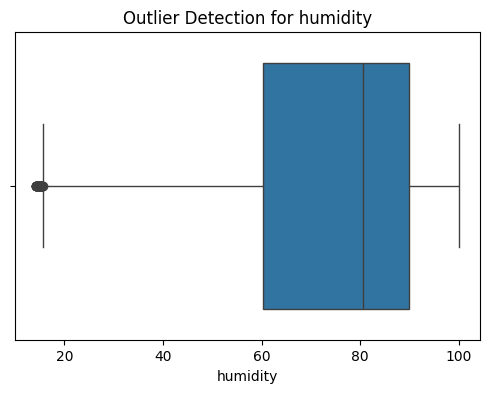

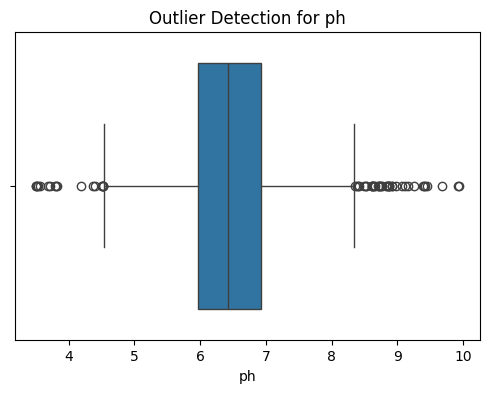

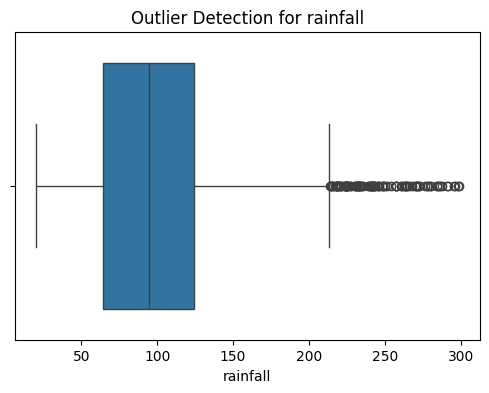

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in numeric_df.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=numeric_df[column])
    plt.title(f"Outlier Detection for {column}")
    plt.show()


## Outlier Detection – Combined Boxplot


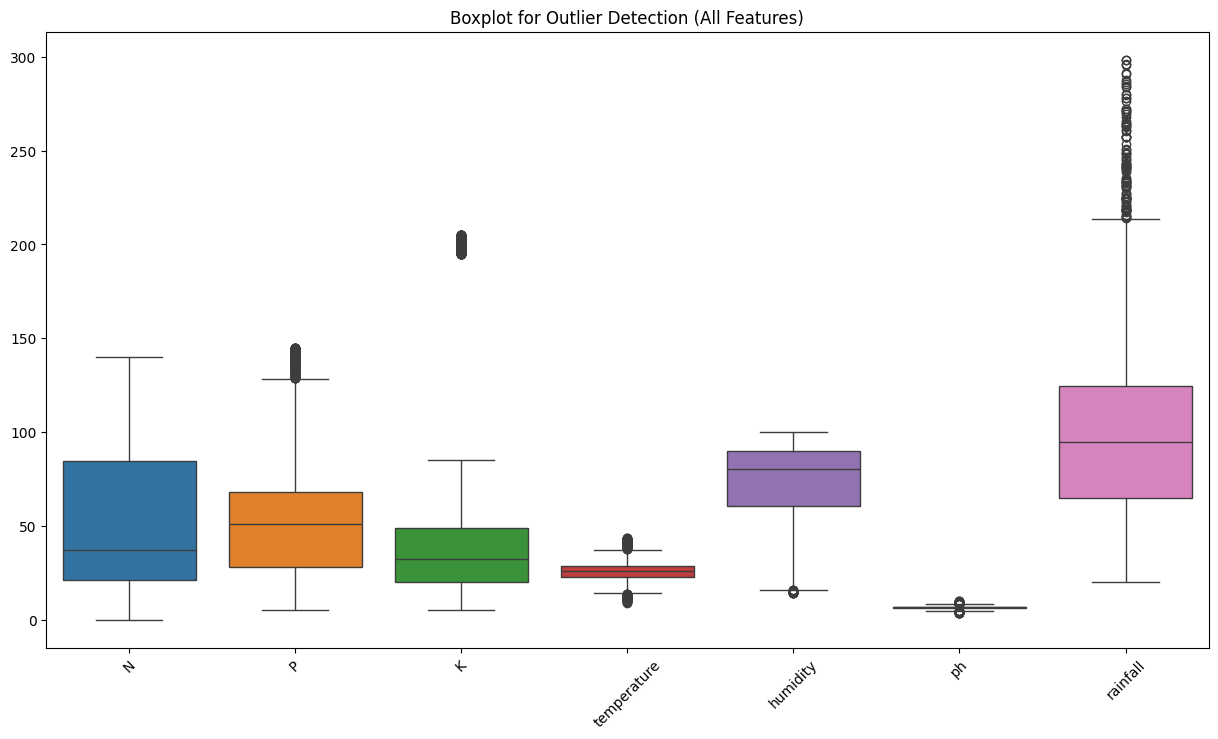

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(15,8))
sns.boxplot(data=numeric_df)
plt.xticks(rotation=45)
plt.title("Boxplot for Outlier Detection (All Features)")
plt.show()


## Outlier Detection using IQR Method


In [11]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Outlier Detection using IQR
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((numeric_df < (Q1 - 1.5 * IQR)) | 
            (numeric_df > (Q3 + 1.5 * IQR)))

print("Number of outliers in each column:")
print(outliers.sum())


Number of outliers in each column:
N                0
P              138
K              200
temperature     86
humidity        30
ph              57
rainfall       100
dtype: int64


## Label Encoding of Target Variable


In [12]:
#automatic encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])

# Display encoding map
Crop_dict = dict(zip(le.classes_, le.transform(le.classes_)))
print(Crop_dict)


{'apple': np.int64(0), 'banana': np.int64(1), 'blackgram': np.int64(2), 'chickpea': np.int64(3), 'coconut': np.int64(4), 'coffee': np.int64(5), 'cotton': np.int64(6), 'grapes': np.int64(7), 'jute': np.int64(8), 'kidneybeans': np.int64(9), 'lentil': np.int64(10), 'maize': np.int64(11), 'mango': np.int64(12), 'mothbeans': np.int64(13), 'mungbean': np.int64(14), 'muskmelon': np.int64(15), 'orange': np.int64(16), 'papaya': np.int64(17), 'pigeonpeas': np.int64(18), 'pomegranate': np.int64(19), 'rice': np.int64(20), 'watermelon': np.int64(21)}


In [13]:
#df[['label', 'label_encoded']].head(10)

In [14]:
df

,N,P,K,temperature,humidity,ph,rainfall,label,label_encoded
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,20
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,5


In [15]:
label_df = pd.DataFrame(list(Crop_dict.items()), columns=['Crop_Name', 'Label_Encoded'])
label_df


,Crop_Name,Label_Encoded
0,apple,0
1,banana,1
2,blackgram,2
3,chickpea,3
4,coconut,4
5,coffee,5
6,cotton,6
7,grapes,7
8,jute,8
9,kidneybeans,9


## Feature and Target Separation


In [16]:
X = df.drop(['label', 'label_encoded'], axis=1)  # input features
Y = df['label_encoded']                          # target (numeric)


In [17]:
X

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [18]:
Y

0       20
1       20
2       20
3       20
4       20
        ..
2195     5
2196     5
2197     5
2198     5
2199     5
Name: label_encoded, Length: 2200, dtype: int64

## Train-Test Split

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (1760, 7)
Testing set size: (440, 7)


In [20]:
X_train


,N,P,K,temperature,humidity,ph,rainfall
1656,17,16,14,16.396243,92.181519,6.625539,102.944161
752,37,79,19,27.543848,69.347863,7.143943,69.408782
892,7,73,25,27.521856,63.132153,7.288057,45.208411
1041,101,70,48,25.360592,75.031933,6.012697,116.553145
1179,0,17,30,35.474783,47.972305,6.279134,97.790725
...,...,...,...,...,...,...,...
1638,10,5,5,21.213070,91.353492,7.817846,112.983436
1095,108,94,47,27.359116,84.546250,6.387431,90.812505
1130,11,36,31,27.920633,51.779659,6.475449,100.258567
1294,11,124,204,13.429886,80.066340,6.361141,71.400430


## Feature Scaling


In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Hyperparameter Tuning – Random Forest


In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {
    'n_estimators': [25, 50, 75, 100, 125],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

rf = RandomForestClassifier(random_state=42)

grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_rf.fit(X_train_scaled, Y_train)

print("Best Parameters:", grid_rf.best_params_)
print("Best Cross-Validation Accuracy:", grid_rf.best_score_)


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.9948863636363636


## Random Forest – Test Evaluation


In [23]:
best_rf = grid_rf.best_estimator_

y_pred = best_rf.predict(X_test_scaled)

from sklearn.metrics import accuracy_score
print("Test Accuracy:", accuracy_score(Y_test, y_pred))


Test Accuracy: 0.9931818181818182


## Hyperparameter Tuning – Logistic Regression


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs'],
    'max_iter': [300]
}

lr = LogisticRegression()

grid_lr = GridSearchCV(
    estimator=lr,
    param_grid=param_grid_lr,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_lr.fit(X_train_scaled, Y_train)

print("Best Parameters:", grid_lr.best_params_)
print("Best CV Accuracy:", grid_lr.best_score_)


Best Parameters: {'C': 100, 'max_iter': 300, 'solver': 'lbfgs'}
Best CV Accuracy: 0.9818181818181818


## Logistic Regression – Test Evaluation


In [25]:
best_lr = grid_lr.best_estimator_
y_pred = best_lr.predict(X_test_scaled)

from sklearn.metrics import accuracy_score
print("Test Accuracy:", accuracy_score(Y_test, y_pred))


Test Accuracy: 0.9704545454545455


## Hyperparameter Tuning – Decision Tree


In [26]:
from sklearn.tree import DecisionTreeClassifier

param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10]
}

dt = DecisionTreeClassifier(random_state=42)

grid_dt = GridSearchCV(
    estimator=dt,
    param_grid=param_grid_dt,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_dt.fit(X_train_scaled, Y_train)

print("Best Parameters:", grid_dt.best_params_)
print("Best CV Accuracy:", grid_dt.best_score_)


Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 5}
Best CV Accuracy: 0.9863636363636363


## Decision Tree – Test Evaluation


In [27]:
best_dt = grid_dt.best_estimator_
y_pred = best_dt.predict(X_test_scaled)

print("Test Accuracy:", accuracy_score(Y_test, y_pred))


Test Accuracy: 0.9863636363636363


## Hyperparameter Tuning – Support Vector Machine (SVM)


In [28]:
from sklearn.svm import SVC

param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf']
}

svm = SVC()

grid_svm = GridSearchCV(
    estimator=svm,
    param_grid=param_grid_svm,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_svm.fit(X_train_scaled, Y_train)

print("Best Parameters:", grid_svm.best_params_)
print("Best CV Accuracy:", grid_svm.best_score_)


Best Parameters: {'C': 10, 'kernel': 'rbf'}
Best CV Accuracy: 0.9875


## SVM – Test Evaluation


In [29]:
best_svm = grid_svm.best_estimator_
y_pred = best_svm.predict(X_test_scaled)

print("Test Accuracy:", accuracy_score(Y_test, y_pred))


Test Accuracy: 0.9795454545454545


## Hyperparameter Tuning – AdaBoost (Initial)


In [30]:
# from sklearn.ensemble import AdaBoostClassifier

# param_grid_ada = {
#     'n_estimators': [50, 100, 150],
#     'learning_rate': [0.01, 0.1, 1]
# }

# ada = AdaBoostClassifier(random_state=42)

# grid_ada = GridSearchCV(
#     estimator=ada,
#     param_grid=param_grid_ada,
#     cv=5,
#     scoring='accuracy',
#     n_jobs=-1
# )

# grid_ada.fit(X_train_scaled, Y_train)

# print("Best Parameters:", grid_ada.best_params_)
# print("Best CV Accuracy:", grid_ada.best_score_)


In [31]:
# best_ada = grid_ada.best_estimator_
# y_pred = best_ada.predict(X_test_scaled)

# print("Test Accuracy:", accuracy_score(Y_test, y_pred))


## Hyperparameter Tuning – AdaBoost (Improved)


In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

base_tree = DecisionTreeClassifier(max_depth=3)

ada = AdaBoostClassifier(
    estimator=base_tree,
    random_state=42
)

param_grid_ada = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1]
}

grid_ada = GridSearchCV(
    estimator=ada,
    param_grid=param_grid_ada,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_ada.fit(X_train_scaled, Y_train)

print("Best Parameters:", grid_ada.best_params_)
print("Best CV Accuracy:", grid_ada.best_score_)


Best Parameters: {'learning_rate': 1, 'n_estimators': 150}
Best CV Accuracy: 0.9920454545454545


## AdaBoost – Final Test Evaluation


In [33]:
best_ada = grid_ada.best_estimator_
y_pred = best_ada.predict(X_test_scaled)

print("Test Accuracy:", accuracy_score(Y_test, y_pred))


Test Accuracy: 0.9863636363636363


## Model Comparison – Test Accuracy Summary

In [34]:
## Model Comparison – Test Accuracy Summary

model_results = {
    "Random Forest": accuracy_score(Y_test, best_rf.predict(X_test_scaled)),
    "Logistic Regression": accuracy_score(Y_test, best_lr.predict(X_test_scaled)),
    "Decision Tree": accuracy_score(Y_test, best_dt.predict(X_test_scaled)),
    "SVM": accuracy_score(Y_test, best_svm.predict(X_test_scaled)),
    "AdaBoost": accuracy_score(Y_test, best_ada.predict(X_test_scaled))
}

# Convert to DataFrame
comparison_df = pd.DataFrame(
    model_results.items(),
    columns=["Model", "Test Accuracy"]
)

# Sort by Accuracy
comparison_df = comparison_df.sort_values(
    by="Test Accuracy",
    ascending=False
).reset_index(drop=True)

comparison_df


,Model,Test Accuracy
0,Random Forest,0.993182
1,Decision Tree,0.986364
2,AdaBoost,0.986364
3,SVM,0.979545
4,Logistic Regression,0.970455


## Final Model Comparison Table


In [35]:
comparison_df.insert(0, "Rank", comparison_df.index + 1)
comparison_df


comparison_df.style.background_gradient(
    subset=["Test Accuracy"],
    cmap="Greens"
)


,Rank,Model,Test Accuracy
0,1,Random Forest,0.993182
1,2,Decision Tree,0.986364
2,3,AdaBoost,0.986364
3,4,SVM,0.979545
4,5,Logistic Regression,0.970455


## Cross-Validation Performance – Best Model (Random Forest)


In [36]:
## Cross-Validation Performance – Best Model (Random Forest)

from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Recreate best Random Forest model (same tuned parameters)
rf_cv = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    random_state=42
)

# Use Stratified K-Fold (better for classification problems)
skf = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

# Perform Cross Validation
cv_scores = cross_val_score(
    rf_cv,
    X_train_scaled,
    Y_train,
    cv=skf,
    scoring='accuracy'
)

print("Cross Validation Scores (5-Fold):", cv_scores)
print("Mean CV Accuracy:", np.round(cv_scores.mean(), 4))
print("Standard Deviation:", np.round(cv_scores.std(), 4))


Cross Validation Scores (5-Fold): [0.99715909 0.98863636 0.99147727 0.99715909 0.99431818]
Mean CV Accuracy: 0.9938
Standard Deviation: 0.0033


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

#use gridsearch

# create instances of all models
models = {
    'Logistic Regression': LogisticRegression(), 
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    # 'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}


for name, model in models.items():
    model.fit(X_train_scaled,Y_train)
    ypred = model.predict(X_test_scaled)
    
    print(f"{name}  with accuracy : {accuracy_score(Y_test,ypred)}")
    print("Confusion matrix : ",confusion_matrix(Y_test,ypred))
    print("==========================================================")

Logistic Regression  with accuracy : 0.9636363636363636
Confusion matrix :  [[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 19  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0 20  0  0  0  0  0  0  0  0  1  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  